In [1]:
# Imports
import pandas as pd
from utils.eval_plots_utils import *

pd.set_option('display.max_rows', None)

In [2]:
base_path = '/vol/biomedic3/bglocker/mscproj24/nma23/data/testing_directory/multi_model/'

# Lists of experiments and models
exps = ['exp1', 'exp2', 'exp3', 'exp4', 'exp5']
models = [
    'PHANTAST', 'vit_b', 'vit_b_lm_amg', 'vit_b_lm_ais',
    'vit_l', 'vit_l_lm_amg', 'vit_l_lm_ais', 'cellpose3',
    # 'ensemble_1', 'ensemble_2', 'ensemble_3', 
    # 'ensemble_4_w_PHANTAST', 'ensemble_5_w_PHANTAST'
]


# Construct nested dictionaries
results_csv_file_paths = {
    exp: {
        model: os.path.join(base_path, f'{exp}/Model_{model}/Results/Results.csv')
        for model in models
    }
    for exp in exps
}

data = {} # Dictionary (key = model name; value = corresponding data from load_nogt_data)
for model in models:
    data[model] = load_nogt_data(model, results_csv_file_paths) 

Loading data for model PHANTAST from file: /vol/biomedic3/bglocker/mscproj24/nma23/data/testing_directory/multi_model/exp1/Model_PHANTAST/Results/Results.csv
Loading data for model PHANTAST from file: /vol/biomedic3/bglocker/mscproj24/nma23/data/testing_directory/multi_model/exp2/Model_PHANTAST/Results/Results.csv
Loading data for model PHANTAST from file: /vol/biomedic3/bglocker/mscproj24/nma23/data/testing_directory/multi_model/exp3/Model_PHANTAST/Results/Results.csv
Loading data for model PHANTAST from file: /vol/biomedic3/bglocker/mscproj24/nma23/data/testing_directory/multi_model/exp4/Model_PHANTAST/Results/Results.csv
Loading data for model PHANTAST from file: /vol/biomedic3/bglocker/mscproj24/nma23/data/testing_directory/multi_model/exp5/Model_PHANTAST/Results/Results.csv
Loading data for model vit_b from file: /vol/biomedic3/bglocker/mscproj24/nma23/data/testing_directory/multi_model/exp1/Model_vit_b/Results/Results.csv
Loading data for model vit_b from file: /vol/biomedic3/bgl

Pairwise Pearson Correlation Coefficients To Compare Model Correlation


,PHANTAST,vit_b,vit_b_lm_amg,vit_b_lm_ais,vit_l,vit_l_lm_amg,vit_l_lm_ais,cellpose3
PHANTAST,1.000000,0.681067,0.104518,0.718750,0.641001,0.267215,0.805402,0.820279
vit_b,0.681067,1.000000,0.040730,0.820137,0.861314,0.140814,0.838835,0.793747
vit_b_lm_amg,0.104518,0.040730,1.000000,0.105755,-0.071804,0.816692,-0.028693,0.151651
vit_b_lm_ais,0.718750,0.820137,0.105755,1.000000,0.691163,0.259347,0.938844,0.912713
vit_l,0.641001,0.861314,-0.071804,0.691163,1.000000,0.001393,0.732914,0.668617
vit_l_lm_amg,0.267215,0.140814,0.816692,0.259347,0.001393,1.000000,0.165213,0.346641
vit_l_lm_ais,0.805402,0.838835,-0.028693,0.938844,0.732914,0.165213,1.000000,0.919944
cellpose3,0.820279,0.793747,0.151651,0.912713,0.668617,0.346641,0.919944,1.000000


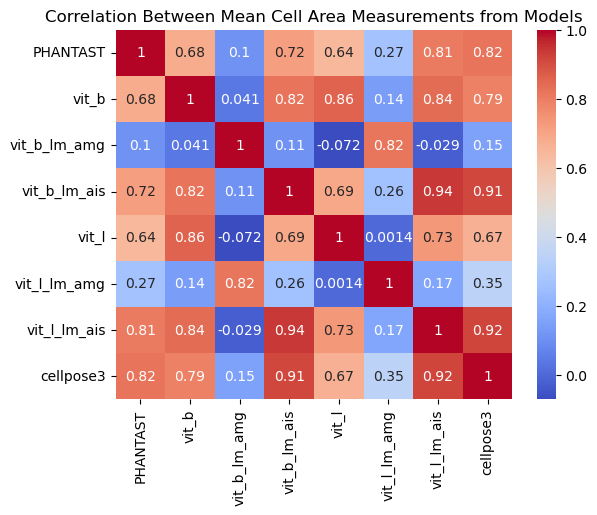

vit_b_lm_amg and vit_l: -0.0718
vit_b_lm_amg and vit_l_lm_ais: -0.0287
vit_l and vit_l_lm_amg: 0.0014
vit_b and vit_b_lm_amg: 0.0407
PHANTAST and vit_b_lm_amg: 0.1045
vit_b_lm_amg and vit_b_lm_ais: 0.1058
vit_b and vit_l_lm_amg: 0.1408
vit_b_lm_amg and cellpose3: 0.1517
vit_l_lm_amg and vit_l_lm_ais: 0.1652
vit_b_lm_ais and vit_l_lm_amg: 0.2593
PHANTAST and vit_l_lm_amg: 0.2672
vit_l_lm_amg and cellpose3: 0.3466
PHANTAST and vit_l: 0.6410
vit_l and cellpose3: 0.6686
PHANTAST and vit_b: 0.6811
vit_b_lm_ais and vit_l: 0.6912
PHANTAST and vit_b_lm_ais: 0.7187
vit_l and vit_l_lm_ais: 0.7329
vit_b and cellpose3: 0.7937
PHANTAST and vit_l_lm_ais: 0.8054
vit_b_lm_amg and vit_l_lm_amg: 0.8167
vit_b and vit_b_lm_ais: 0.8201
PHANTAST and cellpose3: 0.8203
vit_b and vit_l_lm_ais: 0.8388
vit_b and vit_l: 0.8613
vit_b_lm_ais and cellpose3: 0.9127
vit_l_lm_ais and cellpose3: 0.9199
vit_b_lm_ais and vit_l_lm_ais: 0.9388


In [4]:
# Correlation Coefficient Stats Between Models, for ensembling (look for low correlations?) and analysis

correlation_dict = {}

for i, model in enumerate(data):
    correlation_dict[model] = data[model]['Area'] / (1024 ** 2)

# Create a DataFrame from the predictions dictionary
predictions = pd.DataFrame(correlation_dict)

# Calculate pairwise Pearson correlation
correlation_matrix = predictions.corr(method='pearson')
print("Pairwise Pearson Correlation Coefficients To Compare Model Correlation")
display(correlation_matrix)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between Mean Cell Area Measurements from Models')
plt.show()

# List lowest correlations
correlation_list = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        model_1 = correlation_matrix.columns[i]
        model_2 = correlation_matrix.columns[j]
        correlation_value = correlation_matrix.iloc[i, j]
        correlation_list.append((model_1, model_2, correlation_value))

# Sort the list of tuples by the correlation value
sorted_correlations = sorted(correlation_list, key=lambda x: x[2])

# Print from lowest to highest
for item in sorted_correlations:
    print(f"{item[0]} and {item[1]}: {item[2]:.4f}")